<a href="https://colab.research.google.com/github/hochkofler/Master_big_data/blob/main/Net_Regression-Houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 1 - Técnicas avanzadas de análisis de datos**

---



# **1. Formulación del problema**

---



Para el desarrollo de la actividad se eligió un dataset de [kaggle](https://https://www.kaggle.com/), concretamente, "House Sales in King County, USA", el cual nos presenta un conjunto de datos que contiene los precios de venta de viviendas para el condado de King, entre mayo de 2015 y mayo 2015. El dataset contiene las siguientes características:

1. ***id -*** ID unico por cada casa vendida
1. ***date -*** Fecha de venta
1. ***price -*** Precio de venta
1. ***bedrooms -*** Número de habitaciones
1. ***bathrooms -*** Número de baños, donde 0.5 implica que el baño con inodoro pero sin ducha
1. ***sqft_living -*** Superficie en $ft^2$ (pies cuadrados) del espacio habitable del interior de la vivienda
1. ***sqft_lot -*** Superficie en $ft^2$ (pies cuadrados) del terreno
1. ***floors -*** Número de pisos
1. ***waterfront -*** Variable binaria que determina si la vivienda tiene vista al mar o no
1. ***view -*** Índice de 0 a 4 de qué tan buena era la vista de la propiedad
1. ***condition -*** Índice del 1 al 5 sobre el estado del apartamento
1. ***grade -*** Índice del 1 al 13, en el que 1-3 no llega a la construcción y diseño de edificios, 7 tiene un nivel promedio de construcción y diseño, entre 11-13 tiene un alto nivel de calidad de construcción y diseño.
1. ***sqft_above -*** La superficie en $ft^2$ (pies cuadrados) del espacio interior de la vivienda que está sobre el nivel del suelo
1. ***sqft_basement -*** La superficie en $ft^2$ (pies cuadrados) del espacio interior de la vivienda que está por debajo del nivel del suelo
1. ***yr_built -*** El año en que se construyó la casa inicialmente
1. ***yr_renovated -*** El año de la última renovación de la casa
1. ***zipcode -*** El código postal (zip-code) al que pertenece la vivienda
1. ***lat -*** latitud
1. ***long -*** longitud
1. ***sqft_living15 -*** La superficie promedio en $ft^2$ (pies cuadrados) del espacio habitable interior de los 15 vecinos más cercanos
1. ***sqft_lot15 -*** La superficie promedio en $ft^2$ (pies cuadrados)de los terrenos de los 15 vecinos más cercanos.

# **2. Encapsule el problema y observe el panorama general**

---

***Definir el objetivo en términos comerciales***

El objetivo de la empresa es tener un algoritmo que con las características de una vivienda poder predecir el precio de venta aproximado, para posteriormente tomar desiciones de inversión en King county.

***¿Cómo debe plantear este problema (supervisado / no supervisado, online / offline?***

Este es un problema de entrenamiento supervisado, ya que cada registro tiene su resultado (output) esperado (el precio de venta de la vivienda). 

También es una tarea de regresión típica, ya que se le pide que prediga un valor. Más específicamente, este es un problema de regresión múltiple, ya que el sistema usará múltiples características para hacer una predicción. También es un problema de regresión univariante, ya que solo intentamos predecir un valor único para vivienda. Si intentáramos predecir valores múltiples por vivienda, sería un problema de regresión multivariante. 

Finalmente, no hay un flujo continuo de datos que ingresan al sistema, no hay una necesidad particular de ajustarse a los datos cambiantes rápidamente, y los datos son lo suficientemente pequeños como para caber en la memoria, por lo que el aprendizaje por lotes simple debería funcionar bien.

***¿Cómo se debe medir el desempeño?***

Una medida de rendimiento típica para los problemas de regresión es la raíz del error cuadrático medio (RMSE Root Mean Square Error). Da una idea de cuánto error suele cometer el modelo en sus predicciones, con un mayor peso para los errores grandes. La siguiente ecuación muestra la fórmula matemática para calcular el RMSE:

$$RMSE=\sqrt{\frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i-y_i)^2	}$$

Otra medida que se utilizará es el coeficiente $R^2$, esl cual está definido por la siguiente formula:

$$R^2=\dfrac{\sum_{i=1}^{n}{(\hat{y_i}-\overline{y_i})^2}}{\sum_{i=1}^{n}{(y_i-\overline{y_i})^2}}$$

El coeficiente $R^2$ aumenta cuando aumenta el número de características, debido a esto, a veces se prefiere un evaluador más sólido para comparar el desempeño entre diferentes modelos. Este evaluador se llama $R^2$ ajustado y solo aumenta si la suma de la variable reduce el MSE. La definición del $R^2$ ajustado es:


$$\overline{R}^2=R^2- \frac{m-1}{n-m}(1-R^2)$$

Donde
* $ \hat{y}$ el valor estimado del modelo (atributo objetivo).
* $ y $ denota el valor real del atributo objetivo
* $m$ denota la cantidad de coeficientes de entrada en el modelo
* $n$ denotan la cantidad de registros en el modelo

In [166]:
def adjustedR2(r2,n,m):
    return r2-(m-1)/(n-m)*(1-r2)

***Suposiciones del modelo***
* Los datos están ubicados en King County por lo cual, predecir precios de viviendas fuera de estos limites puede generar errores importantes.
* Los datos proporcionados corresponden a mayo 2015 y 2016 por lo tanto es posible que los precios tengan un cambio importante en la actualidad debido a la imflación.
* No se conoce el criterio para la definición de las variables categóricas (view, condition y grade).

# **3. Obtener los datos**

---

In [167]:
import requests
import os
def download_if_missing(url, filename):
    if not os.path.exists(filename):
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        r = requests.get(url, allow_redirects=True)
        with open(filename, 'wb') as f:
          f.write(r.content)

download_if_missing("https://github.com/hochkofler/Master_big_data/raw/main/kc_house_data.csv", "./kc_house_data.csv")

### **3.1 Visualizamos los datos descargados**

In [168]:
!head kc_house_data.csv


id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
"7129300520","20141013T000000",221900,3,1,1180,5650,"1",0,0,3,7,1180,0,1955,0,"98178",47.5112,-122.257,1340,5650
"6414100192","20141209T000000",538000,3,2.25,2570,7242,"2",0,0,3,7,2170,400,1951,1991,"98125",47.721,-122.319,1690,7639
"5631500400","20150225T000000",180000,2,1,770,10000,"1",0,0,3,6,770,0,1933,0,"98028",47.7379,-122.233,2720,8062
"2487200875","20141209T000000",604000,4,3,1960,5000,"1",0,0,5,7,1050,910,1965,0,"98136",47.5208,-122.393,1360,5000
"1954400510","20150218T000000",510000,3,2,1680,8080,"1",0,0,3,8,1680,0,1987,0,"98074",47.6168,-122.045,1800,7503
"7237550310","20140512T000000",1.225e+006,4,4.5,5420,101930,"1",0,0,3,11,3890,1530,2001,0,"98053",47.6561,-122.005,4760,101930
"1321400060","20140627T000000",257500,3,2.25,1715,6819,"2",0,0,3,7,1715,0,1995,0,"98003",47.3097,-122.327,2238,6819
"2

## **3.2 Análisis exploratorio previo**

Preparamos el entorno

In [169]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # imprimimos en pantalla el resultado de todos los statements

Cargamos los datos, los visualizamos y hacemos un análisis exploratorio de los mismos.

In [170]:
df_houses = pd.read_csv('kc_house_data.csv')

In [171]:
df_houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Como puede verse, el archivo descargado ya contiene los nombres a las columnas, y se encuentra correctamente separado. por lo que no es necesario usar los parámetros opcionales de la función read_csv.

In [172]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Tenemos 21613 registros en el dataset, lo cual es relativamente pequeño para los estandares de machine learning, pero es perfecto para probar algoritmos utilizando pocos recursos. Como podemos verificar, no tenemos valores nulos en ninguna característica. A continuación veremos la distribución de estos atributos: 

In [173]:
df_houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Se puede observar que ciertos atributos tienen distribuciones que pueden ser interesantes de análisar a mayor profundidad, como por ejemplo sqft_basement, yr_renovated y las variables binarias waterfront y view.
Otra manera de poder ver con que clase de datos estamos tratando es graficando cada atributo en un histograma.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6660e6c50>,
      dtype=object)

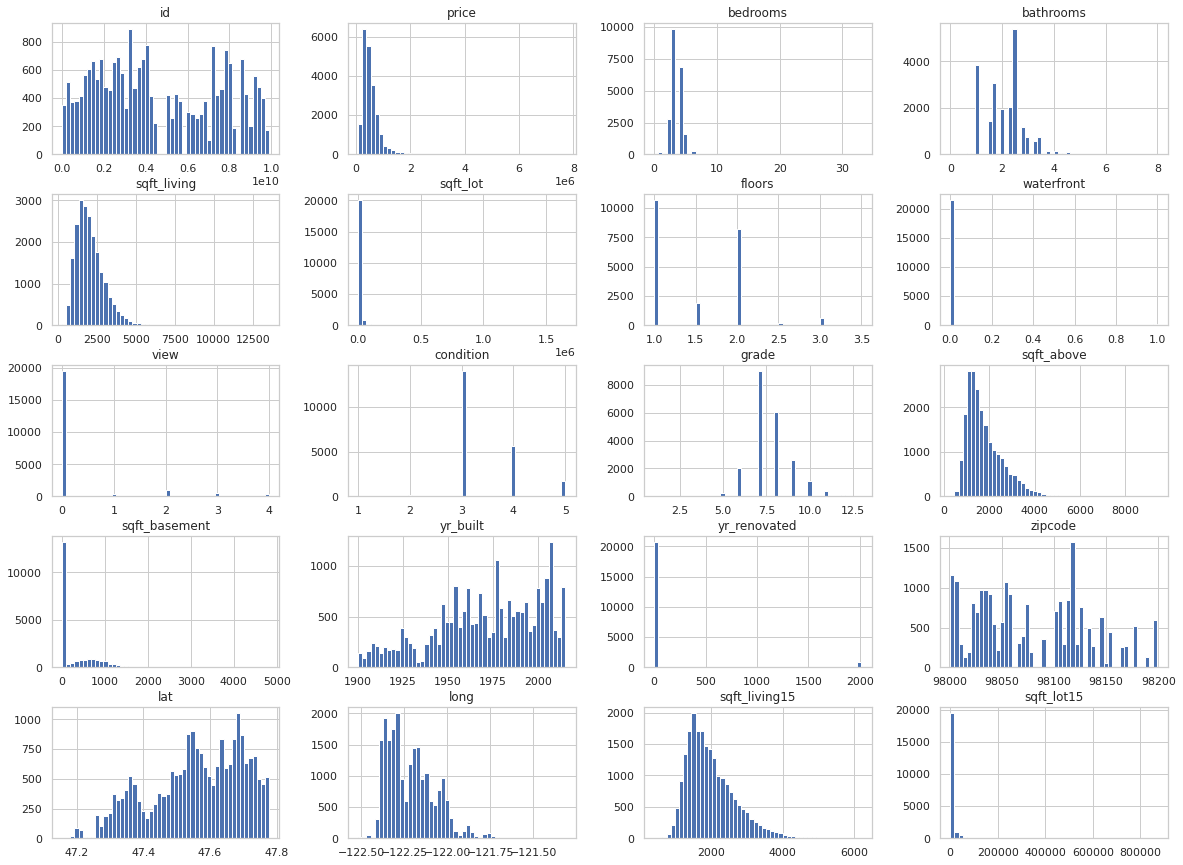

In [174]:
%matplotlib inline
import matplotlib.pyplot as plt
df_houses.hist(bins=50, figsize=(20,15))
plt.show()

Podemos tener las siguientes observaciones del análisis exploratorio visto hasta el momento:

* Si bien se tienen bien distribuidos los precios de las viviendas, hay que tener en cuenta que para precios mayores a 1 millon de usd, por lo que esté puede ser una limitante importante a la hora de predecir esté tipo de viviendas.
* Se tiene muy pocas viviendas con vistas al oceano (atributo waterfront).
* Muy poca proporción de las viviendas han sido renovadas.
* Finalmente los histogramas, en general presentan una distribución con sesgo a la derecha, esto puede hacer que sea un poco más difícil para algunos algoritmos de aprendizaje automático para detectar patrones. Intentaremos transformar estos atributos

##**3.3 Crear el dataset de prueba**

La creación de un dataset de prueba es teóricamente simple: elija algunas instancias al azar, generalmente el 20% del conjunto de datos (o menos si su conjunto de datos es muy grande), y déjelas a un lado. Sin embargo esto generalmente está bien si su conjunto de datos es lo suficientemente grande (especialmente en relación con la cantidad de atributos), pero si
no lo es, corre el riesgo de introducir un sesgo de muestreo significativo. Por lo tanto se utilizará un muestreo estratificado, lo cual implica dividir la población en subgrupos homogéneos llamados estratos, y muestrearlos con número correcto de instancias de cada estrato para garantizar que el conjunto de prueba sea representativo de la población general. Para lograr esto primero debemos definir los estratos, los cuales se realizarán a partir del atributo precio:

In [175]:
df_houses["price_cat"] = pd.qcut(df_houses['price'], q=10, labels=np.arange(0,10,1))

In [176]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_houses, df_houses["price_cat"]):
  strat_train_set = df_houses.loc[train_index]
  strat_test_set = df_houses.loc[test_index]

Comparemos la distribución del set de prueba y de entrenamiento:

In [177]:
pd.concat([strat_train_set['price'], strat_test_set['price']],axis=1, keys=["Train Price", "Test Price"]).describe()

,Train Price,Test Price
count,1.729000e+04,4.323000e+03
mean,5.396057e+05,5.420177e+05
std,3.651617e+05,3.749221e+05
min,7.500000e+04,8.650000e+04
25%,3.216125e+05,3.220000e+05
50%,4.500000e+05,4.500000e+05
75%,6.450000e+05,6.400000e+05
max,7.700000e+06,5.350000e+06


Como se puede apreciar se logró un muestreo estratificado, es decir que tanto el set de entrenamiento como el de prueba se distribuyen de forma simular según el atributo precio (atributo objetivo).

#**4. Análisis exploratorio**

---

Hasta ahora, solo ha echado un vistazo rápido a los datos para obtener una comprensión general del tipo de datos que está manipulando. Ahora el objetivo es profundizar un poco más.
Primero, nos asegurese de haber dejado de lado el test set y solo se está explorando el set de entrenamiento. Además, si el set de entrenamiento es muy grande, es posible que desee probar un conjunto de exploración para que las manipulaciones sean fáciles y rápidas. En nuestro caso, el conjunto es bastante pequeño, por lo que puede trabajar directamente en el dataset completo. Creemos una copia para que podamos manipularla sin dañar el conjunto de entrenamiento.

In [178]:
housing = strat_train_set.copy()

## **4.1 Visualisación de datos geo-espaciales**

Dado que tenemos información geo-espacial (latitud y longitud) es una buena idea visualizarlos.
Veamos en un mapa donde es donde tenemos mayor cantidad de registros:

In [179]:
import folium
from folium.plugins import HeatMap

# find the row of the house which has the highest price
maxpr=housing.loc[housing['price'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=10):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = housing.copy()
# select a zipcode for the heatmap
#set(df['zipcode'])
#df_copy = df[df['zipcode']==98001].copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

Claramente se aprecia las areas donde tenemos mayor densidad de registros, según el anterior mapa podemos ver una de las posibles limitaciones de nuestro modelo:
* **No se tienen datos suficientes de la zona este y no metropolitana de King County**

Ahora observemos los precios de la vivienda. El color representa el precio de la vivienda. Usaremos un mapa de colores predefinido (opción cmap) llamado jet, que va desde el azul (valores bajos) al rojo (precios altos), 

Text(0.5, 1.0, 'Total viviendas')

Text(0, 0.5, 'Price')

Text(0, 0.5, 'Price')

Text(0.5, 1.0, 'Viviendas con precio menor a 1 millon')

Text(0, 0.5, 'Price')

Text(0.5, 1.0, 'Viviendas con precio mayor a 1 millon')

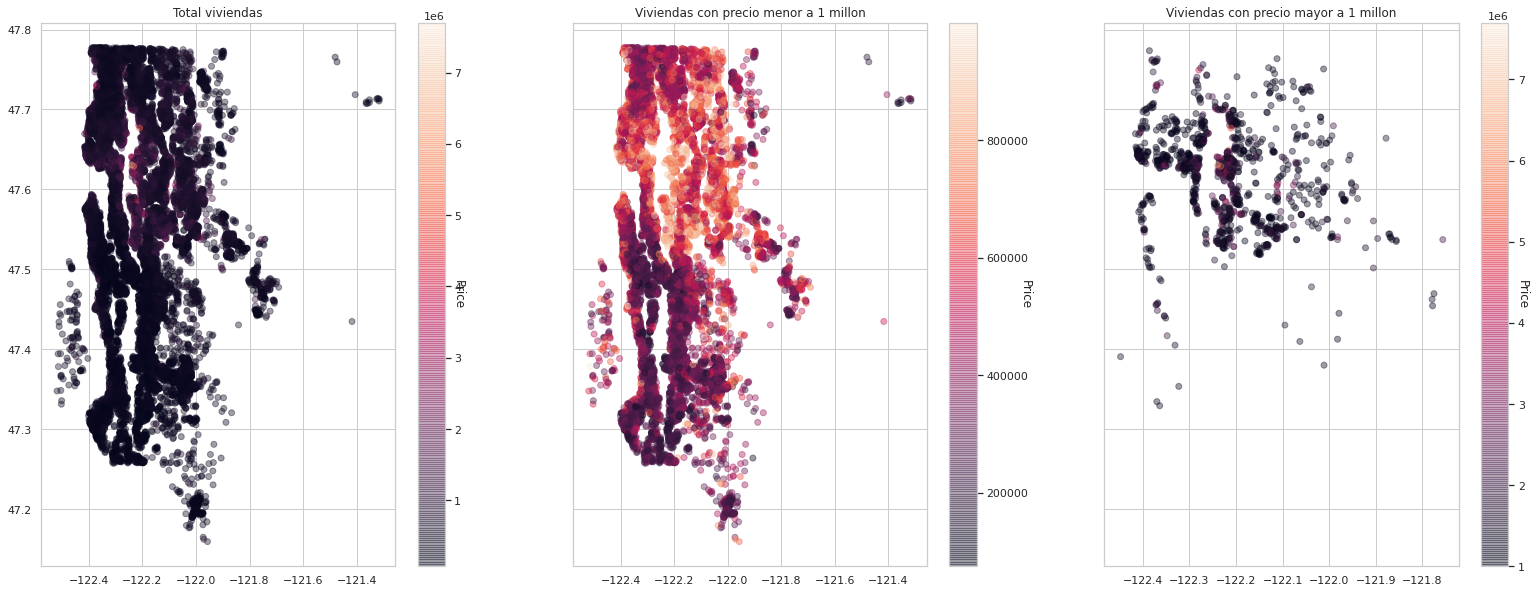

In [180]:
fig, axes = plt.subplots(ncols=3, sharey = True, figsize = (27, 10))

a0 = axes[0].scatter(housing['long'],housing['lat'], c = housing['price'], marker = "o", alpha=0.4)
cbar1 = fig.colorbar(a0, ax=axes[0])
axes[0].set_title("Total viviendas")
cbar1.ax.set_ylabel('Price', rotation=270)

a1 = axes[1].scatter(housing[housing["price"]<1000000]['long'],housing[housing["price"]<1000000]['lat'], c = housing[housing["price"]<1000000]['price'], marker = "o", alpha=0.4)
cbar2 = fig.colorbar(a1, ax=axes[1])
cbar2.ax.set_ylabel('Price', rotation=270)
axes[1].set_title("Viviendas con precio menor a 1 millon")

a2 = axes[2].scatter(housing[housing["price"]>=1000000]['long'],housing[housing["price"]>=1000000]['lat'], c = housing[housing["price"]>=1000000]['price'], marker = "o", alpha=0.4)
cbar3 = fig.colorbar(a2, ax=axes[2])
cbar3.ax.set_ylabel('Price', rotation=270)
axes[2].set_title("Viviendas con precio mayor a 1 millon")
plt.show()

Esta imagen le dice que los precios de la vivienda están muy relacionados con la ubicación (por ejemplo, cerca del océano) y con la densidad de población.
Otra característica interesante es que las viviendas del norte tienden a tener un precio más alto.

## **4.2 Busqueda de correlaciones**

Dado que el conjunto de datos no es demasiado grande, podemos calcular fácilmente el coeficiente de correlación (también llamado coeficiente de Pearson) entre cada par de atributos

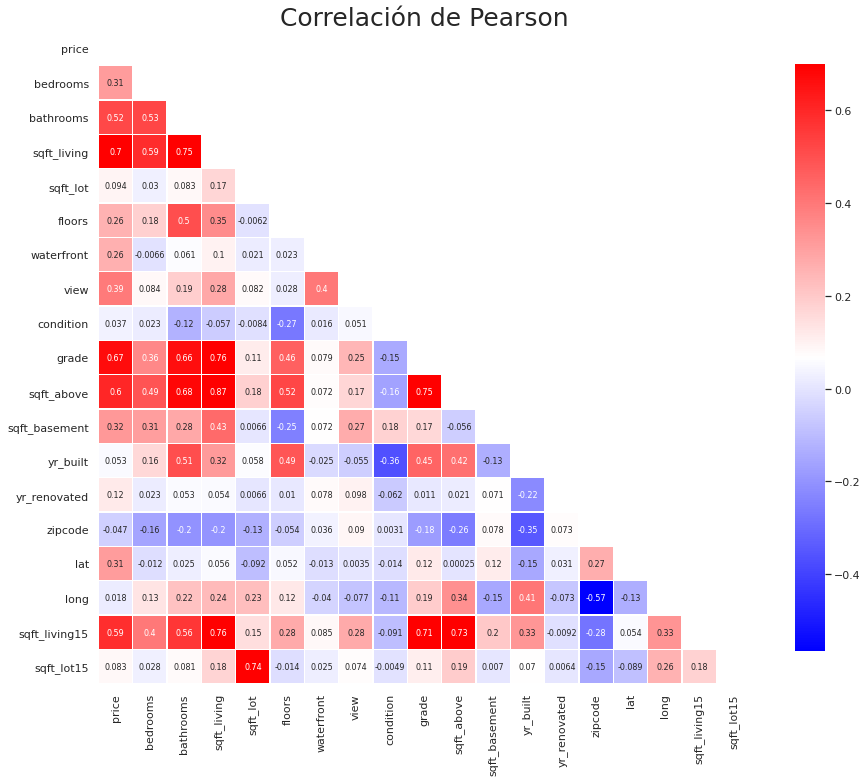

In [181]:
features = housing.columns[1:].tolist()

mask = np.zeros_like(housing[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Correlación de Pearson',fontsize=25)

sns.heatmap(housing[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="bwr", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

Como podemos observar, los principales existe una relación linear entre el precio (price) y los atributos sqft_living15, sqft_above, grade, sqft_living y bathrooms. Análisaremos alguna el comportamiento de estás variables respecto al precio a continuación: 

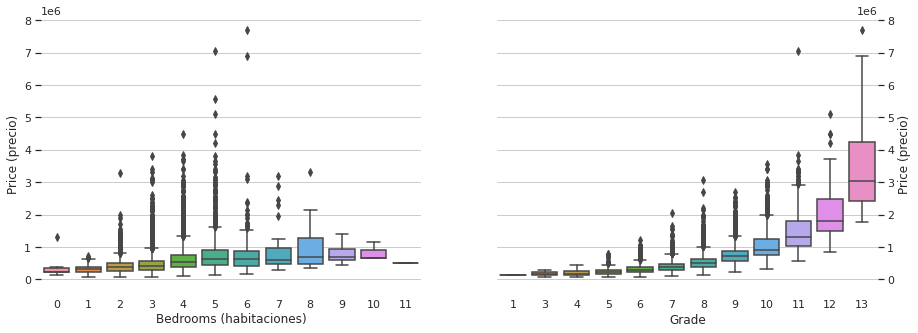

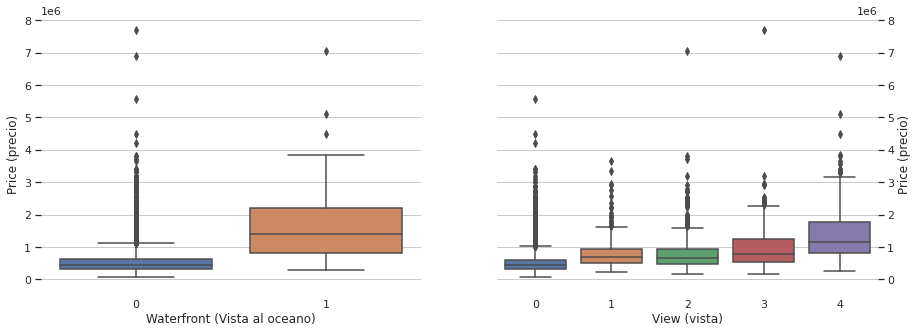

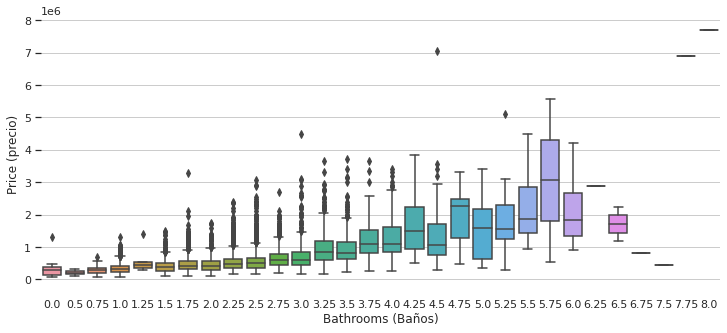

In [182]:
import seaborn as sns
sns.set(style="whitegrid", font_scale=1)
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=housing['bedrooms'],y=housing['price'], ax=axes[0])
sns.boxplot(x=housing['grade'],y=housing['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms (habitaciones)', ylabel='Price (precio)')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Grade', ylabel='Price (precio)')

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=housing['waterfront'],y=housing['price'], ax=axes[0])
sns.boxplot(x=housing['view'],y=housing['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront (Vista al oceano)', ylabel='Price (precio)')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='View (vista)', ylabel='Price (precio)')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=housing['bathrooms'],y=housing['price'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms (Baños)', ylabel='Price (precio)');

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc66e708da0>,
      dtype=object)

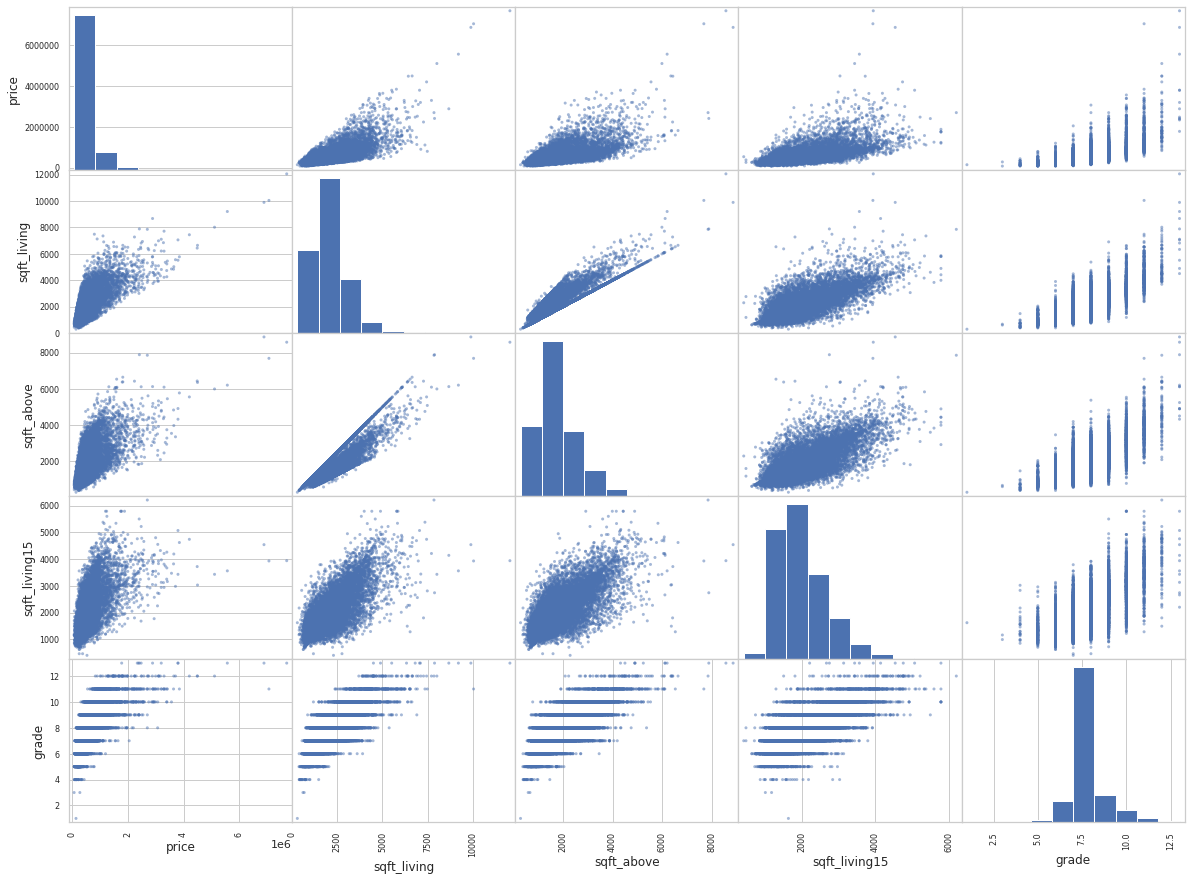

In [183]:
from pandas.plotting import scatter_matrix
features = ['price','sqft_living','sqft_above','sqft_living15','grade']
scatter_matrix(housing[features], figsize=(20, 15))

Las anteriores gráficas nos revela algunas cosas interesantes. Primero, la correlación es realmente entre las variables anteriormente análisadas (price, sqft_above, sqft_living, grade y sqft_living15); se puede ver claramente la tendencia alcista y los puntos no están demasiado dispersos. Dado que grade y view son atributos dados por una evaluación previa de un experto, tal vez sea mejor tratar de evitar que estás entren en el modelo (o incomporar nuevos atributos que los sustituyan).

## **4.3 Ingeniería de carácteristicas**

Un último paso que debemos hacer antes de preparar los datos para su entrenamiento, es intentar encontrar combinaciones de carácteristicas que nos permitan generar nuevos atributos que podamos incluir en el modelo. Veamos unos cuantos de ellos:

In [184]:
housing['bathrooms_per_bedroom']=housing['bathrooms']/housing['bedrooms']
housing['sqft_living_per_sqft_lot'] = housing['sqft_living']/housing['sqft_lot']
housing['sqft_living_per_living15'] = housing['sqft_living']/housing['sqft_living15']
housing['sqft_lot_per_lot15'] = housing['sqft_lot']/housing['sqft_lot15']

In [185]:
corr_matrix = housing.corr()
corr_matrix["price"].sort_values(ascending=False)

price                       1.000000
sqft_living                 0.701112
grade                       0.665954
sqft_above                  0.603274
sqft_living15               0.585053
bathrooms                   0.521158
view                        0.394282
sqft_basement               0.323468
bedrooms                    0.311541
lat                         0.309645
sqft_living_per_living15    0.299416
bathrooms_per_bedroom       0.280143
waterfront                  0.264859
floors                      0.256805
sqft_living_per_sqft_lot    0.124166
yr_renovated                0.121241
sqft_lot                    0.094111
sqft_lot15                  0.082540
yr_built                    0.053082
sqft_lot_per_lot15          0.052433
condition                   0.037196
long                        0.018130
id                         -0.018021
zipcode                    -0.046876
Name: price, dtype: float64

Como podemos observar, ninguna de las variables añadidas añaden valor agregado (basandonos en la coeficiente de Pearson) por lo que ninguna de estas carácteristicas será tomada en cuenta en el modelo.

# **5. Preparación de datos para el modelo**

---

Como hemos podido verificar en el análisis exploratorio previo, no se encuentran datos nulos o no validos, por lo que no es necesario realizar una limpieza de los datos. Por otro lado la normalización se realizará directamente cuando se aplique el algoritmo de machine learning seleccionado.



# **6. Selección del algortitmo y modelado**

---

Teniendo en cuenta lo expuesto en la [sección 2](https://colab.research.google.com/drive/17J2kUGfxhLdVcZbTQZUkUdHwgRR_yd1H#scrollTo=gFGTKqxM-LJG&line=1&uniqifier=1), estamos frente a un problema de regresión supervisado, por lo que a continuación se compararán diferentes algoritmos de regresión (OLS, Ridge, Lasso y Net) con el fin de encontrar sus fortalezas, debilidades, debilidades y similitudes.

In [186]:
df_train = strat_train_set.copy()
df_train = df_train.drop(['id','date', 'price_cat'], axis=1)
df_test = strat_test_set.copy()
df_test = df_test.drop(['id','date', 'price_cat'], axis=1)

Creamos una tabla con la cual compararemos los diferentes algoritmos:

In [187]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
evaluation = pd.DataFrame({'Modelo': [],
                           'Detalle':[],
                           'RMSE':[],
                           'R2 (training)':[],
                           'R2 ajustada (training)':[],
                           'R2 (test)':[],
                           'R2 ajustada (test)':[],
                           '5-Fold Cross Validation (train)':[]})

## **6.1 Regresión OLS (mínimos cuadrados)**

La regresión lineal es el algoritmo de regresión más simple y se describió por primera vez en 1875. El nombre "regresión" se deriva del fenómeno que Francis Galton notó de regresión hacia la media . Esto se refería al hecho de que, si bien los hijos de padres muy altos o padres muy bajos eran todavía más altos o más bajos, tendían a estar más cerca de la altura media. Esto se denominó "regresión hacia la media".

La regresión de mínimos cuadrados (OLS Ordinaly Least Squares) funciona simplemente ajustando una línea (o una hipersuperficie en más de 2 dimensiones) y calculando la distancia desde la estimación hasta los puntos reales observados. El modelo de mínimos cuadrados es el modelo que minimiza la distancia al cuadrado entre el modelo y los datos observados. Y lo realiza mediante la siguiente función de coste:

$$J(W)=\sum_{i=1}^{N}{(W_0+W_1 x_1^{(i)}+...+W_m x_M^{(i)}}-y_i)^2 = \sum_{i=1}^{N}{(y_i-\hat{y_i})^2}=\left \| y-\hat{y} \right \|_2^2$$

Donde:
* $ \hat{y}$ el valor estimado del modelo (atributo objetivo).
* $ y $ denota el valor real del atributo objetivo
* $W_m$, $m \in [0, M]$ denotan los coeficientes de cada atributo dado por el algoritmo
* $x_m$ denotan cada uno de los atributos de entrada para el algoritmo

In [188]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
features = df_train.columns.drop('price').tolist()
model1 = linear_model.LinearRegression()
model1.fit(df_train[features],df_train['price'])

print('Intercepción: {}'.format(model1.intercept_))
print('Coeficientes: {}'.format(model1.coef_))

pred = model1.predict(df_test[features])
rmsecm = float(format(np.sqrt(mean_squared_error(df_test['price'],pred)),'.3f'))
rtrcm = float(format(model1.score(df_train[features],df_train['price']),'.3f'))
artrcm = float(format(adjustedR2(model1.score(df_train[features],df_train['price']),df_train.shape[0],len(features)),'.3f'))
rtecm = float(format(model1.score(df_test[features],df_test['price']),'.3f'))
artecm = float(format(adjustedR2(model1.score(df_test[features],df_test['price']),df_test.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(model1,df_train[features],df_train['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Regresión multiple','todas los atributos',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation (train)', ascending=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Intercepción: 5944518.202223057
Coeficientes: [-3.87371257e+04  4.11278199e+04  1.11635574e+02  2.01325264e-01
  8.29049903e+03  5.87758965e+05  5.03988543e+04  2.55476678e+04
  9.49707201e+04  7.00299151e+01  4.16056586e+01 -2.60937893e+03
  1.94665050e+01 -5.86666182e+02  5.99732036e+05 -2.25339210e+05
  2.30823323e+01 -3.49018405e-01]


,Modelo,Detalle,RMSE,R2 (training),R2 ajustada (training),R2 (test),R2 ajustada (test),5-Fold Cross Validation (train)
0,Regresión multiple,todas los atributos,205500.705,0.7,0.699,0.699,0.698,0.697


Realmente no es un mal resultado sin embargo, si bien $R^2$ es un valor aceptable, se tiene un error de estimación RMSE de 200 000 USD, lo caul es demacioado amplio. Podemos realizar el mismo algoritmo con features seleccionadas.

In [189]:
features = ['bedrooms','bathrooms','sqft_living','floors','waterfront','lat','long','sqft_living15']
model2 = linear_model.LinearRegression()
model2.fit(df_train[features],df_train['price'])

print('Intercepción: {}'.format(model2.intercept_))
print('Coeficientes: {}'.format(model2.coef_))

pred = model2.predict(df_test[features])
rmsecm = float(format(np.sqrt(mean_squared_error(df_test['price'],pred)),'.3f'))
rtrcm = float(format(model2.score(df_train[features],df_train['price']),'.3f'))
artrcm = float(format(adjustedR2(model2.score(df_train[features],df_train['price']),df_train.shape[0],len(features)),'.3f'))
rtecm = float(format(model2.score(df_test[features],df_test['price']),'.3f'))
artecm = float(format(adjustedR2(model2.score(df_test[features],df_test['price']),df_test.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(model2,df_train[features],df_train['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Regresión multiple','Atributos seleccionados',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation (train)', ascending=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Intercepción: -73346754.96541439
Coeficientes: [-4.75207813e+04  2.05107835e+04  2.49581825e+02 -3.98289681e+03
  7.72332995e+05  6.55571121e+05 -3.44822221e+05  8.23911943e+01]


,Modelo,Detalle,RMSE,R2 (training),R2 ajustada (training),R2 (test),R2 ajustada (test),5-Fold Cross Validation (train)
0,Regresión multiple,todas los atributos,205500.705,0.700,0.699,0.699,0.698,0.697
1,Regresión multiple,Atributos seleccionados,227872.983,0.635,0.634,0.631,0.630,0.632


## **6.2 Regularización**

La regresión OLS tiene la propiedad deseada de ser insesgado. Sin embargo, puede tener una gran varianza. Específicamente, esto sucede cuando:

* Los atributos están altamente correlacionadas entre sí
* Hay muchos atributos.

La solución general a esto es: **reducir la varianza a costa de introducir algún sesgo**. Este enfoque se denomina regularización y casi siempre es beneficioso para el rendimiento predictivo del modelo.


### **Ridge Regresion**


De la discusión hasta ahora hemos concluido que nos gustaría disminuir la complejidad del modelo, que es el número de predictores. Podríamos usar la selección hacia adelante o hacia atrás para esto, pero de esa manera no podríamos decir nada sobre el efecto de las variables eliminadas en la respuesta. La eliminación de predictores del modelo puede verse como establecer sus coeficientes en cero. En lugar de obligarlos a ser exactamente cero, penalicémoslos si están demasiado lejos de cero, obligándolos a ser pequeños de forma continua. De esta manera, disminuimos la complejidad del modelo mientras mantenemos todas las variables en el modelo. Esto, básicamente, es lo que hace Ridge Regression.

En Ridge Regression, la función de pérdida de OLS se aumenta de tal manera que no solo minimizamos la suma de los residuos al cuadrado, sino que también penalizamos el tamaño de las estimaciones de los parámetros para reducirlos a cero:

$$L_{ridge}({W})=\sum_{i=1}^{n}{(W_0+W_1 x_1^{(i)}+...+W_m x_m^{(i)}}-y_i)^2 + \lambda \sum_{j=1}^{m}{W_j^2}= \left \| y-\hat{y} \right \|_2^2 + \lambda \left \| W \right \|_2^2$$

El parámetro $\lambda$ es la penalización por regularización.
* Si $\lambda \rightarrow 0, W_{ridge} \rightarrow W_{OLS}$
* Si $\lambda \rightarrow \infty, W_{ridge} \rightarrow 0$

In [190]:
features = df_train.columns.drop('price').tolist()

model_ridge = linear_model.Ridge(alpha=1)
model_ridge.fit(df_train[features],df_train['price'])

pred1 = model_ridge.predict(df_test[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(df_test['price'],pred1)),'.3f'))
rtrcm1 = float(format(model_ridge.score(df_train[features],df_train['price']),'.3f'))
artrcm1 = float(format(adjustedR2(model_ridge.score(df_train[features],df_train['price']),df_train.shape[0],len(features)),'.3f'))
rtecm1 = float(format(model_ridge.score(df_test[features],df_test['price']),'.3f'))
artecm1 = float(format(adjustedR2(model_ridge.score(df_test[features],df_test['price']),df_test.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(model_ridge,df_train[features],df_train['price'],cv=5).mean(),'.3f'))

model_ridge = linear_model.Ridge(alpha=100)
model_ridge.fit(df_train[features],df_train['price'])

pred2 = model_ridge.predict(df_test[features])
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(df_test['price'],pred2)),'.3f'))
rtrcm2 = float(format(model_ridge.score(df_train[features],df_train['price']),'.3f'))
artrcm2 = float(format(adjustedR2(model_ridge.score(df_train[features],df_train['price']),df_train.shape[0],len(features)),'.3f'))
rtecm2 = float(format(model_ridge.score(df_test[features],df_test['price']),'.3f'))
artecm2 = float(format(adjustedR2(model_ridge.score(df_test[features],df_test['price']),df_test.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(model_ridge,df_train[features],df_train['price'],cv=5).mean(),'.3f'))

model_ridge = linear_model.Ridge(alpha=1000)
model_ridge.fit(df_train[features],df_train['price'])

pred3 = model_ridge.predict(df_test[features])
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(df_test['price'],pred3)),'.3f'))
rtrcm3 = float(format(model_ridge.score(df_train[features],df_train['price']),'.3f'))
artrcm3 = float(format(adjustedR2(model_ridge.score(df_train[features],df_train['price']),df_train.shape[0],len(features)),'.3f'))
rtecm3 = float(format(model_ridge.score(df_test[features],df_test['price']),'.3f'))
artecm3 = float(format(adjustedR2(model_ridge.score(df_test[features],df_test['price']),df_test.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(model_ridge,df_train[features],df_train['price'],cv=5).mean(),'.3f'))


r = evaluation.shape[0]
evaluation.loc[r] = ['Ridge Regression','lambda=1, Todos los atributos',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluation.loc[r+1] = ['Ridge Regression','lambda=100, Todos los atributos',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]
evaluation.loc[r+2] = ['Ridge Regression','lambda=1000, Todos los atributos',rmsecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation (train)', ascending=False)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

,Modelo,Detalle,RMSE,R2 (training),R2 ajustada (training),R2 (test),R2 ajustada (test),5-Fold Cross Validation (train)
0,Regresión multiple,todas los atributos,205500.705,0.700,0.699,0.699,0.698,0.697
2,Ridge Regression,"lambda=1, Todos los atributos",205496.718,0.700,0.699,0.700,0.698,0.697
3,Ridge Regression,"lambda=100, Todos los atributos",207585.113,0.692,0.692,0.693,0.692,0.688
4,Ridge Regression,"lambda=1000, Todos los atributos",218702.386,0.657,0.657,0.660,0.658,0.652
1,Regresión multiple,Atributos seleccionados,227872.983,0.635,0.634,0.631,0.630,0.632


### **Lasso Regression**

Lasso (Least Absolute Shrinkage and Selection Operator), es muy similar conceptualmente a Ridge. También agrega una penalización para los coeficientes distintos de cero, pero a diferencia de la regresión de Ridge que penaliza la suma de coeficientes al cuadrado (la llamada penalización L2), Lasso penaliza la suma de sus valores absolutos (penalización L1). Como resultado, para valores altos de $\alpha$ , muchos coeficientes se ponen exactamente a cero bajo Lasso, lo que nunca es el caso en la regresión Ridge.

$$L_{lasso}({W})=\sum_{i=1}^{n}{(W_0+W_1 x_1^{(i)}+...+W_m x_m^{(i)}}-y_i)^2 + \alpha \sum_{j=1}^{m}{\left | W_j \right |}= \left \| y-\hat{y} \right \|_2^2 + \alpha \left \| W \right \|_1$$

El parámetro $\alpha$ es la penalización por regularización.
* Si $\alpha \rightarrow 0, W_{lasso} \rightarrow W_{OLS}$
* Si $\alpha \rightarrow \infty, m \rightarrow 0$

In [191]:
features = df_train.columns.drop('price').tolist()

model_lasso = linear_model.Lasso(alpha=1)
model_lasso.fit(df_train[features],df_train['price'])

pred1 = model_lasso.predict(df_test[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(df_test['price'],pred1)),'.3f'))
rtrcm1 = float(format(model_lasso.score(df_train[features],df_train['price']),'.3f'))
artrcm1 = float(format(adjustedR2(model_lasso.score(df_train[features],df_train['price']),df_train.shape[0],len(features)),'.3f'))
rtecm1 = float(format(model_lasso.score(df_test[features],df_test['price']),'.3f'))
artecm1 = float(format(adjustedR2(model_lasso.score(df_test[features],df_test['price']),df_test.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(model_lasso,df_train[features],df_train['price'],cv=5).mean(),'.3f'))

model_lasso = linear_model.Lasso(alpha=100)
model_lasso.fit(df_train[features],df_train['price'])

pred2 = model_lasso.predict(df_test[features])
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(df_test['price'],pred2)),'.3f'))
rtrcm2 = float(format(model_lasso.score(df_train[features],df_train['price']),'.3f'))
artrcm2 = float(format(adjustedR2(model_lasso.score(df_train[features],df_train['price']),df_train.shape[0],len(features)),'.3f'))
rtecm2 = float(format(model_lasso.score(df_test[features],df_test['price']),'.3f'))
artecm2 = float(format(adjustedR2(model_lasso.score(df_test[features],df_test['price']),df_test.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(model_lasso,df_train[features],df_train['price'],cv=5).mean(),'.3f'))

model_lasso = linear_model.Lasso(alpha=1000)
model_lasso.fit(df_train[features],df_train['price'])

pred3 = model_lasso.predict(df_test[features])
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(df_test['price'],pred3)),'.3f'))
rtrcm3 = float(format(model_lasso.score(df_train[features],df_train['price']),'.3f'))
artrcm3 = float(format(adjustedR2(model_lasso.score(df_train[features],df_train['price']),df_train.shape[0],len(features)),'.3f'))
rtecm3 = float(format(model_lasso.score(df_test[features],df_test['price']),'.3f'))
artecm3 = float(format(adjustedR2(model_lasso.score(df_test[features],df_test['price']),df_test.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(model_lasso,df_train[features],df_train['price'],cv=5).mean(),'.3f'))


r = evaluation.shape[0]
evaluation.loc[r] = ['Lasso Regression','alpha=1, Todos los atributos',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluation.loc[r+1] = ['Lasso Regression','alpha=100, Todos los atributos',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]
evaluation.loc[r+2] = ['Lasso Regression','alpha=1000, Todos los atributos',rmsecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation (train)', ascending=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 313943847606423.94, tolerance: 230536787595.21185
  positive)


Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 248194862356592.94, tolerance: 180887258269.171
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256574320514979.62, tolerance: 188538621530.93604
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250953611915091.72, tolerance: 185703559095.1795
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257532595

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250273075746986.3, tolerance: 180887258269.171
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258765237268956.6, tolerance: 188538621530.93604
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 253208279807862.78, tolerance: 185703559095.1795
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25968206966

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267260274590904.06, tolerance: 180887258269.171
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 276802197519182.7, tolerance: 188538621530.93604
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271768219196798.28, tolerance: 185703559095.1795
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2773527844

,Modelo,Detalle,RMSE,R2 (training),R2 ajustada (training),R2 (test),R2 ajustada (test),5-Fold Cross Validation (train)
0,Regresión multiple,todas los atributos,205500.705,0.700,0.699,0.699,0.698,0.697
2,Ridge Regression,"lambda=1, Todos los atributos",205496.718,0.700,0.699,0.700,0.698,0.697
5,Lasso Regression,"alpha=1, Todos los atributos",205500.390,0.700,0.699,0.700,0.698,0.697
6,Lasso Regression,"alpha=100, Todos los atributos",205476.641,0.700,0.699,0.700,0.698,0.697
7,Lasso Regression,"alpha=1000, Todos los atributos",205928.832,0.697,0.697,0.698,0.697,0.695
3,Ridge Regression,"lambda=100, Todos los atributos",207585.113,0.692,0.692,0.693,0.692,0.688
4,Ridge Regression,"lambda=1000, Todos los atributos",218702.386,0.657,0.657,0.660,0.658,0.652
1,Regresión multiple,Atributos seleccionados,227872.983,0.635,0.634,0.631,0.630,0.632


## **6.3 Elastic Net Regression**

Elastic Net es un término medio entre Ridge Regression y Lasso Regression. Es una combinación simple de los términos de regularización de Ridge y Lasso, y puede controlar la proporción de mezcla r. Cuando $r = 0$, Elastic Net es equivalente a Ridge Regression, y cuando $r = 1$, es equivalente a Lasso Regression como se puede ver en la siguiente ecuación:

$$J(W)= MSE(W)+r\alpha \left \| W \right \|_1+\frac{1-r}{2}\alpha\left \| W \right \|_2^2$$

Entonces, ¿cuándo debería usar Regresión lineal simple (es decir, sin regularización), Ridge, Lasso o Elastic Net? Casi siempre es preferible tener al menos un poco de regularización, por lo que generalmente debe evitar la Regresión lineal simple. Ridge es un buen valor predeterminado, pero si sospecha que solo pocos atributos son útiles, debería preferir Lasso o Elastic Net porque tienden a reducir el peso de los atributos inútiles a cero, como hemos comentado. En general, se prefiere Elastic Net a Lasso porque Lasso puede comportarse de forma errática cuando el número de atributos es mayor que el número de registros de entrenamiento o cuando varios atributos están fuertemente correlacionados.

Si estas interesado en controlar la penalización $L_1$ y $L_2$ por separado, hay que tener en cuenta lo siguiente:

$$a*L_1+b*L_2$$

Donde:

$$\alpha=a+b$$


$$ r = \frac{a}{a+b}$$

### **Parámetros**

####**fit_intercept** : bool, default=True
> Si la intersección debe estimarse o no. Si False, se supone que los datos ya están centrados. Los datos no están centrados por lo cual, ***se elegirá True***.

####**normalize** : bool, default=True
> Este parámetro se ignora cuando fit_interceptse establece en False. Si es verdadero, los regresores X se normalizarán antes de la regresión restando la media y dividiendo por la norma $L_2$. Si desea estandarizar, utilice StandardScaler antes de llamar fit a un estimador con normalize=False.
Dado que es recomendable normalizar los datos (y no se han normalizado previamente), ***se evaluará posteriormente su impacto***.

####**precompute** : bool / array, default=False
>Si utilizar una matriz Gram precalculada para acelerar los cálculos. La matriz de Gram también se puede pasar como argumento. Para una entrada escasa, esta opción siempre es Truepara preservar la escasez. Dado que no estamos utilizando una gran cantidad de datos, ***se elegirá False***.

####**max_iter** : int, default=1000
>El número máximo de iteraciones. ***se evaluará posteriormente su impacto***.

####**copy_X** : bool, default=True
>Si True, se copiará X; de lo contrario, puede sobrescribirse. para mayor seguridad ***se elegirá True***.

####**tol** : float, default=1e-4
>La tolerancia para la optimización: si las actualizaciones son más pequeñas que tol, el código de optimización comprueba la optimización del espacio dual y continúa hasta que es más pequeño que tol. Dado que no requerimos mayor tolerancia ***se dejará el valor por defecto***.

####**warm_start** : bool, default=False
>Cuando se establece en True, reutiliza la solución de la llamada anterior para que encaje como inicialización; de lo contrario, simplemente borra la solución anterior.

####**positive** : bool, default=False
>Cuando se establece en True, fuerza a los coeficientes a ser positivos. ***Se dejará evaluará posteriormente su impacto***

####**random_state** : int/RandomState instance, default=None
>La semilla del generador de números pseudoaleatorios que selecciona una característica aleatoria para actualizar. ***Se dejará el valor por defecto***.

####**selection** :{‘cyclic’, ‘random’}, default=’cyclic’
>Si se establece en 'random', un coeficiente aleatorio se actualiza en cada iteración en lugar de recorrer las características secuencialmente de forma predeterminada. Esta (configuración en 'random') a menudo conduce a una convergencia significativamente más rápida, especialmente cuando tol es mayor que 1e-4. ***Se dejará el valor por defecto***.

### **Hiperparámetros**
####**alpha** : float, default=1.0
> Constante que multiplica los términos de penalización. El valor predeterminado es 1.0. $\alpha=0$ es equivalente a $OLS$ Regression. Para el cual existe el objeto **LinarRegression**, el cual es más eficiente para $\alpha=0$.

####**l1_ratio** : float, default=0.5
>  El parámetro de mezcla de Elastic Net, $0 <= r <= 1$, 

>Para $r=0$ la penalidad es $L_2$ (Lasso regression)

>Para $r=1$ la penalidad es $L_1$ (Ridge regression)

>Para $0 < r < 1$ es una mezcla entre las penalidades $L_1$ y $L_2$.

Para encontrar el valor optimo de este hiperparámetro se utilizará la función GridSearch, la cual compara todas las combinaciones dadas con los hiperparámetros en base a una medida de desempeño.

### **Modelado**

In [192]:
from sklearn.linear_model import ElasticNet
features = df_train.columns.drop('price').tolist()

model_net = ElasticNet(alpha=1, l1_ratio=0.5)
model_net.fit(df_train[features],df_train['price'])

pred1 = model_net.predict(df_test[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(df_test['price'],pred1)),'.3f'))
rtrcm1 = float(format(model_net.score(df_train[features],df_train['price']),'.3f'))
artrcm1 = float(format(adjustedR2(model_net.score(df_train[features],df_train['price']),df_train.shape[0],len(features)),'.3f'))
rtecm1 = float(format(model_net.score(df_test[features],df_test['price']),'.3f'))
artecm1 = float(format(adjustedR2(model_net.score(df_test[features],df_test['price']),df_test.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(model_net,df_train[features],df_train['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Elastic-net Regression','r=0.5 ,Todos los atributos',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]

model_net = ElasticNet(alpha=1, l1_ratio=0.75)
model_net.fit(df_train[features],df_train['price'])

pred1 = model_net.predict(df_test[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(df_test['price'],pred1)),'.3f'))
rtrcm1 = float(format(model_net.score(df_train[features],df_train['price']),'.3f'))
artrcm1 = float(format(adjustedR2(model_net.score(df_train[features],df_train['price']),df_train.shape[0],len(features)),'.3f'))
rtecm1 = float(format(model_net.score(df_test[features],df_test['price']),'.3f'))
artecm1 = float(format(adjustedR2(model_net.score(df_test[features],df_test['price']),df_test.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(model_net,df_train[features],df_train['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Elastic-net Regression','r=0.75 ,Todos los atributos',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]

model_net = ElasticNet(alpha=1, l1_ratio=0.25)
model_net.fit(df_train[features],df_train['price'])

pred1 = model_net.predict(df_test[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(df_test['price'],pred1)),'.3f'))
rtrcm1 = float(format(model_net.score(df_train[features],df_train['price']),'.3f'))
artrcm1 = float(format(adjustedR2(model_net.score(df_train[features],df_train['price']),df_train.shape[0],len(features)),'.3f'))
rtecm1 = float(format(model_net.score(df_test[features],df_test['price']),'.3f'))
artecm1 = float(format(adjustedR2(model_net.score(df_test[features],df_test['price']),df_test.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(model_net,df_train[features],df_train['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Elastic-net Regression','r=0.25 ,Todos los atributos',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluation.sort_values(by = '5-Fold Cross Validation (train)', ascending=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 467415787302220.8, tolerance: 230536787595.21185
  positive)


ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369064196514363.5, tolerance: 180887258269.171
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 381360635921404.25, tolerance: 188538621530.93604
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 376438454542432.9, tolerance: 185703559095.1795
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38020001094

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.75,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352516863925555.94, tolerance: 180887258269.171
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 365165850749562.4, tolerance: 188538621530.93604
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 360886916607990.5, tolerance: 185703559095.1795
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36427159380

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.25,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 378793865789765.1, tolerance: 180887258269.171
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 390904728014500.06, tolerance: 188538621530.93604
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 385537035316111.0, tolerance: 185703559095.1795
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38952293254

,Modelo,Detalle,RMSE,R2 (training),R2 ajustada (training),R2 (test),R2 ajustada (test),5-Fold Cross Validation (train)
0,Regresión multiple,todas los atributos,205500.705,0.700,0.699,0.699,0.698,0.697
2,Ridge Regression,"lambda=1, Todos los atributos",205496.718,0.700,0.699,0.700,0.698,0.697
5,Lasso Regression,"alpha=1, Todos los atributos",205500.390,0.700,0.699,0.700,0.698,0.697
6,Lasso Regression,"alpha=100, Todos los atributos",205476.641,0.700,0.699,0.700,0.698,0.697
7,Lasso Regression,"alpha=1000, Todos los atributos",205928.832,0.697,0.697,0.698,0.697,0.695
3,Ridge Regression,"lambda=100, Todos los atributos",207585.113,0.692,0.692,0.693,0.692,0.688
4,Ridge Regression,"lambda=1000, Todos los atributos",218702.386,0.657,0.657,0.660,0.658,0.652
9,Elastic-net Regression,"r=0.75 ,Todos los atributos",225898.108,0.634,0.634,0.637,0.635,0.633
1,Regresión multiple,Atributos seleccionados,227872.983,0.635,0.634,0.631,0.630,0.632
8,Elastic-net Regression,"r=0.5 ,Todos los atributos",230472.089,0.619,0.619,0.622,0.621,0.618


## **6.4 Regresión Polinomica**

Dado que ya se ha modelado regresión lineal utilizando diversos métodos de regularización, y aún se tiene underfitting (desajuste) en el modelo, la mejor manera de ajustar más el modelo es aumentando el grado a la expresión.

Para poder encontrar el modelo optimo, se iterará entre las diferentes comfiguraciones entre diferentes parámetros para encontrar el modelo que mejor se ajuste.

In [193]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

def PolynomialRegression(degree=2,alpha=1, l1_ratio=0.5, positive=0, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), linear_model.ElasticNet(alpha=alpha, l1_ratio=l1_ratio, positive=positive, **kwargs))

In [194]:
from sklearn.model_selection import GridSearchCV

alpha = [0.01, 0.1, 1, 10, 100, 1000, 10000]
l1_ratio = [0, 0.25, 0.5, 0.75, 1]
degrees = [1, 2]
normalize = [0]
param_grid = dict(elasticnet__alpha=alpha, elasticnet__l1_ratio=l1_ratio, polynomialfeatures__degree=degrees, elasticnet__normalize = normalize)
grid = GridSearchCV(estimator=PolynomialRegression(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=3, return_train_score=True)
grid_result = grid.fit(df_train[features], df_train['price'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 299105094941135.3, tolerance: 180887258269.171
  positive)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-41182892509.218, test=-45210689161.356), total=   0.4s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310849419014823.44, tolerance: 188538621530.93604
  positive)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-42716812026.500, test=-38209369694.018), total=   0.5s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 306899232499559.3, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-42079143817.181, test=-40427201708.781), total=   0.4s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310551773761544.6, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-42722564036.082, test=-38405973307.358), total=   0.4s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293724367746360.7, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-40332591000.106, test=-48272052938.391), total=   0.4s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197106544631428.12, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28463973441.582, test=-30610089898.531), total=   3.9s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198795747796152.12, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28698827454.133, test=-29197525432.667), total=   4.0s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197493443817056.7, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28520745934.816, test=-31889016636.375), total=   4.1s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200786597070463.1, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28999588041.573, test=-27973855039.290), total=   4.0s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192704288023780.06, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-27802922870.384, test=-36237910781.046), total=   3.9s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295083134260930.6, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-40753834812.384, test=-44622892753.206), total=   0.4s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 306491618409777.6, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-42233303544.871, test=-37796275842.777), total=   0.4s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 302398457502853.6, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-41565681194.029, test=-40100737877.606), total=   0.5s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 306294861658552.6, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-42255638639.735, test=-37939954700.427), total=   0.5s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289544785900894.6, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-39869103768.147, test=-47754242261.350), total=   0.5s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197053249341820.9, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28457827180.803, test=-30600783931.480), total=   4.0s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198720789438037.78, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28690134198.497, test=-29195854758.823), total=   4.0s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197436722790138.47, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28514119369.524, test=-31862652908.430), total=   3.9s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200733215004438.22, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28993314493.401, test=-27959874875.950), total=   3.9s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192593699812873.1, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-27785333298.012, test=-36270613204.169), total=   4.9s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289962010715867.25, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-40294394743.034, test=-43931230351.526), total=   0.4s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 300892300198743.5, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-41709652928.211, test=-37365935951.677), total=   0.5s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296572182565602.44, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-41001631698.245, test=-39814703402.176), total=   0.4s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 300840765868896.94, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-41751755600.253, test=-37429733422.062), total=   0.4s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 284170460255963.56, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-39364498118.027, test=-47186270963.738), total=   0.4s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196978540231818.8, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28448610784.745, test=-30585289696.102), total=   3.9s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198617261202260.34, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28678568284.143, test=-29186591493.761), total=   4.0s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197357859452546.03, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28504779925.970, test=-31826578255.703), total=   4.0s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200658560321422.6, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28984455585.262, test=-27943679144.792), total=   3.7s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192429720779117.1, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-27760684587.553, test=-36324832308.615), total=   3.8s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282995136026701.8, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-39846191457.499, test=-43115903467.104), total=   0.4s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293194221712331.1, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-41191662299.633, test=-36975246567.988), total=   0.5s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288471470208423.6, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-40430387240.355, test=-39697710318.309), total=   0.4s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293368971271156.2, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-41255464944.720, test=-36907897531.906), total=   0.4s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 276757549094388.0, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-38859692673.231, test=-46612911651.050), total=   0.5s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196843944817269.2, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28432530611.584, test=-30553584701.203), total=   4.0s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198446239937774.56, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28661585287.848, test=-29160094815.461), total=   3.8s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197225159460248.12, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28489634554.887, test=-31764037140.809), total=   3.8s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200533880317006.44, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28970004210.428, test=-27925719832.524), total=   3.7s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192138310941306.78, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-27722287936.316, test=-36427275042.929), total=   3.7s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 248173846570721.44, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-39585279504.235, test=-42195607091.142), total=   0.5s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256552178599080.0, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-40885946277.603, test=-36842513398.817), total=   0.4s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250930864202463.6, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-40080331730.974, test=-40221681529.104), total=   0.4s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257510881330364.62, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-40963868876.909, test=-36529469629.731), total=   0.5s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241255457216157.47, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-38555180517.621, test=-46265362205.117), total=   0.4s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196448552354654.47, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28404892448.838, test=-30468548276.721), total=   3.7s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198059106428830.0, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28637767272.404, test=-29142514468.862), total=   3.7s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196855346710862.53, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28463707538.080, test=-31478938387.223), total=   3.6s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200174055218764.66, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28943567739.521, test=-27878516990.298), total=   3.5s
[CV] elasticnet__alpha=0.01, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191306533759423.88, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=0.01, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-27661388010.965, test=-36703229991.446), total=   3.6s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 335040440672584.4, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-45923119859.050, test=-50371262705.967), total=   0.4s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348030582740596.4, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-47823427939.917, test=-42893124017.230), total=   0.4s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 344281199950371.44, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-47331035359.241, test=-45062175452.861), total=   0.4s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 347277190362549.4, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-47730690823.426, test=-43303332713.310), total=   0.5s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329607674036283.5, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-45231330826.082, test=-53665600913.402), total=   0.4s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197743076087508.78, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28524274792.224, test=-30603298083.412), total=   3.5s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199543349094607.62, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28784409332.825, test=-29136441077.628), total=   3.6s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198100825238322.8, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28585855475.892, test=-32089888315.935), total=   3.5s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201336642367167.0, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29058192287.553, test=-28094004559.773), total=   3.5s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193455232217900.9, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-27914653151.767, test=-36182943975.753), total=   3.5s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 330120481967865.06, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-45364305535.540, test=-49867544614.605), total=   0.4s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 343129461177034.5, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-47243922198.638, test=-42350651783.435), total=   0.5s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339459835179150.75, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-46745503901.402, test=-44456144403.074), total=   0.5s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 342408712473202.4, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-47155116706.711, test=-42744003197.792), total=   0.4s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324846927552693.7, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-44670169371.148, test=-53041164310.223), total=   0.4s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197635523074495.66, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28513920244.616, test=-30612228335.003), total=   3.5s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199430585911768.88, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28771368424.015, test=-29148676875.138), total=   3.4s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198004689147659.5, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28575492922.752, test=-32063699229.454), total=   3.4s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201249474878741.97, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29049189947.333, test=-28079768441.571), total=   3.6s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193364020701411.0, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-27903535493.016, test=-36173091109.052), total=   3.7s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 323528310228268.6, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-44537618651.312, test=-49062572476.262), total=   0.4s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 336478410015558.9, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-46372701483.751, test=-41535131777.711), total=   0.5s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332863675094851.75, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-45859790428.219, test=-43588209596.430), total=   0.4s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 335807692777232.5, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-46293920017.069, test=-41907137297.342), total=   0.5s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 318394904577679.06, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-43830528312.307, test=-52116172808.525), total=   0.4s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197499030813394.62, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28501163726.881, test=-30621820777.438), total=   3.7s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199282327232963.66, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28754409331.282, test=-29164608477.514), total=   3.6s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197879874271770.44, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28562281942.628, test=-32028731999.401), total=   3.6s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201137486835390.97, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29037534580.474, test=-28059039443.854), total=   3.5s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193238812222372.94, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-27887029985.512, test=-36164869306.697), total=   3.5s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 312476921787865.1, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-43013412457.306, test=-47428583650.068), total=   0.4s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 325077566519877.25, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-44734948999.645, test=-40016931785.169), total=   0.5s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321415556989563.1, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-44180997239.902, test=-42071126572.589), total=   0.4s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324532511901528.75, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-44685863386.495, test=-40338650117.916), total=   0.4s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 307375506626193.2, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-42260914659.777, test=-50398488049.715), total=   0.4s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197304621297225.84, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28483450479.627, test=-30626840239.729), total=   3.6s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199055762688770.16, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28728755571.094, test=-29185444603.894), total=   3.5s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197694915163540.5, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28542852256.955, test=-31970997726.129), total=   3.5s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200971627723842.1, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29020074404.428, test=-28022650388.219), total=   3.5s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193023079192897.16, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-27854824144.194, test=-36173105800.627), total=   3.5s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 248175784008892.62, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-39585279507.276, test=-42195666596.134), total=   0.4s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256554212952623.8, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-40885946280.604, test=-36842495929.369), total=   0.4s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250932920485186.3, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-40080331734.066, test=-40221613580.596), total=   0.5s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257512868240139.62, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-40963868879.893, test=-36529481160.132), total=   0.4s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241257460761254.53, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-38555180520.694, test=-46265369389.932), total=   0.5s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196451651521562.62, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28404935612.649, test=-30468398320.311), total=   3.6s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198062106876494.16, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28637806702.988, test=-29142340864.814), total=   3.6s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196858539683596.56, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28463726462.667, test=-31478853762.290), total=   3.6s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200177342703548.66, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28943605906.229, test=-27878244084.328), total=   3.7s
[CV] elasticnet__alpha=0.1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191309984007824.47, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=0.1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-27661406439.273, test=-36703745905.575), total=   3.7s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 385295791868087.75, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-52608230453.175, test=-55784685788.368), total=   0.4s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 397299120346705.0, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-54392992290.070, test=-48910305258.968), total=   0.5s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391608948672499.8, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-53731813035.140, test=-52333225548.357), total=   0.4s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 395741277032278.56, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-54257249625.937, test=-49862355867.902), total=   0.5s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377125727304105.4, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-51614515790.051, test=-60779204100.215), total=   0.4s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198727608847803.56, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28667659455.269, test=-30604418098.484), total=   3.7s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200535770881206.2, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28932472511.403, test=-29088078723.199), total=   3.7s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198942958376903.8, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28712299500.693, test=-32450007713.435), total=   3.6s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202157741738424.22, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29173810812.236, test=-28202632319.791), total=   3.6s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194236233002572.3, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28026666181.695, test=-36332722806.841), total=   3.6s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 378793865789765.1, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-51452379437.793, test=-54809736551.249), total=   0.4s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 390904728014500.06, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-53264386017.929, test=-47884132317.556), total=   0.4s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 385537035316111.0, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-52652283897.087, test=-51117286695.335), total=   0.4s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 389522932542019.6, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-53148588825.884, test=-48728275684.059), total=   0.4s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 371008439935295.94, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-50527103213.929, test=-59589411004.748), total=   0.4s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198619105697875.12, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28643558284.397, test=-30589223501.414), total=   3.5s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200424741155127.72, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28909116060.472, test=-29086056798.472), total=   3.5s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198851540252362.4, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28692036471.971, test=-32383356912.942), total=   3.5s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202065250706526.78, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29153613403.084, test=-28185065334.277), total=   3.5s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194149069547544.12, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28007678472.809, test=-36310046074.557), total=   3.4s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369064196514363.5, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-49932367078.201, test=-53559280620.640), total=   0.4s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 381360635921404.25, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-51784372484.649, test=-46537231308.936), total=   0.5s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 376438454542432.9, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-51227963238.477, test=-49495872227.855), total=   0.4s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 380200010946441.3, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-51685359137.277, test=-47238404308.363), total=   0.4s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 361846095842082.2, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-49093930761.205, test=-58007859578.645), total=   0.5s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198450090200932.6, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28612043685.084, test=-30575144361.096), total=   3.5s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200253224542581.06, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28878467698.615, test=-29088300921.470), total=   3.4s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198708332584332.78, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28665369957.934, test=-32298995365.851), total=   3.4s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201920575129084.34, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29127969013.304, test=-28164628278.944), total=   4.0s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194014148885953.47, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-27983939927.832, test=-36276620227.486), total=   3.9s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352516863925555.94, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-47856284126.136, test=-51921635710.725), total=   0.5s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 365165850749562.4, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-49760188984.110, test=-44687688346.045), total=   0.4s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 360886916607990.5, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-49257519634.673, test=-47221630036.978), total=   0.5s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 364271593802399.0, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-49666968136.351, test=-45206831266.186), total=   0.4s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 346213102249651.3, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-47120683185.031, test=-55797978275.287), total=   0.5s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198136252026926.97, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28567027432.465, test=-30575473845.121), total=   3.8s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199939783829488.9, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28832953934.440, test=-29102184446.801), total=   3.7s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198441520617137.78, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28626077236.758, test=-32188752494.123), total=   3.6s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201656710234201.1, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29092642599.680, test=-28135385024.493), total=   3.7s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193767516172722.03, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-27950852033.474, test=-36227917710.965), total=   3.6s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 248194862356592.94, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-39585279811.383, test=-42196261923.833), total=   0.5s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256574320514979.62, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-40885946580.683, test=-36842321490.967), total=   0.4s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250953611915091.72, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-40080332043.203, test=-40220934401.804), total=   0.4s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257532595430966.9, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-40963869178.270, test=-36529596711.079), total=   0.5s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241277200231145.62, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-38555180827.988, test=-46265441532.797), total=   0.5s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196478437985468.2, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28405402447.390, test=-30466966571.219), total=   3.7s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198088000656592.03, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28638236578.489, test=-29140631380.486), total=   3.6s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196886119357386.44, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28463949629.497, test=-31478085564.195), total=   3.7s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200206075991728.72, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28944004437.955, test=-27875589641.781), total=   3.7s
[CV] elasticnet__alpha=1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191340166060876.3, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=1, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-27661614133.243, test=-36708212260.302), total=   3.7s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 413766735614596.4, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-59111963432.357, test=-61506121838.325), total=   0.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 425476445043743.2, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-60809793566.090, test=-54750983131.342), total=   0.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 418143765669352.4, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-59791616947.927, test=-59026426242.292), total=   0.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 422915250152002.56, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-60462487249.104, test=-56231308677.726), total=   0.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 403872637805892.5, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-57723975436.021, test=-67370236840.356), total=   0.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199209175316726.0, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28791084762.445, test=-30652494052.965), total=   3.7s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201022434360319.34, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29053740592.614, test=-29149448798.908), total=   3.7s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199335419108103.7, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28812102556.500, test=-32787518464.886), total=   3.7s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202550302790038.0, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29276579221.226, test=-28320359215.511), total=   3.7s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194633532412114.88, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28130757759.522, test=-36340628346.472), total=   3.6s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 412041734644207.56, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-58703419480.588, test=-61138746456.452), total=   0.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 423759519079335.06, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-60403458750.999, test=-54379066648.870), total=   0.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 416518403161330.4, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-59411137971.455, test=-58610092480.031), total=   0.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 421258346921873.7, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-60073809717.147, test=-55836191532.867), total=   0.4s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 402239743943014.0, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-57340237050.596, test=-66957827939.900), total=   0.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199181796520965.25, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28784531494.529, test=-30652203682.180), total=   3.6s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200995353447497.5, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29047331460.601, test=-29144486571.171), total=   3.6s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199313376755998.1, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28807206469.181, test=-32771658254.572), total=   3.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202527964690338.1, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29271364768.690, test=-28313851024.673), total=   3.6s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194609737414408.47, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28125166388.037, test=-36344638723.741), total=   3.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 408852418232748.94, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-57946843754.829, test=-60460447584.416), total=   0.4s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 420584858514709.3, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-59652069106.976, test=-53693515531.595), total=   0.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 413516884830920.4, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-58706550125.893, test=-57838743932.221), total=   0.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 418204326396912.8, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-59353745352.980, test=-55098967645.358), total=   0.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 399222407672440.44, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-56629644552.053, test=-66195336296.645), total=   0.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199133059533592.94, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28772471380.195, test=-30652804570.393), total=   3.6s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200946798693793.3, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29035550155.226, test=-29135593168.965), total=   3.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199274939441404.97, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28798183979.447, test=-32742346595.598), total=   3.6s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202489350345738.8, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29261890777.156, test=-28301290411.701), total=   3.8s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194568020148831.47, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28114940114.915, test=-36353372708.295), total=   3.7s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 400608744410846.4, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-56071581433.040, test=-58793065666.538), total=   0.4s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 412390229144171.44, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-57796015216.433, test=-52004124665.764), total=   0.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 405765722718882.5, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-56960009266.402, test=-55920004277.687), total=   0.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 410322074009256.0, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-57566987773.152, test=-53261964238.258), total=   0.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391428527897834.56, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-54868469807.581, test=-64303084441.576), total=   0.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199005829205297.38, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28739520656.215, test=-30647969014.646), total=   3.7s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200818808064539.53, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29003032534.184, test=-29113738606.704), total=   3.6s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199173309504159.12, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28772229184.828, test=-32653002336.363), total=   3.6s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202388386689009.16, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29235098827.047, test=-28266889621.077), total=   3.6s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194461785778045.06, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28086807041.935, test=-36367377323.421), total=   3.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 248385507523366.25, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-39585310222.118, test=-42202242979.070), total=   0.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256775188802309.12, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-40885976588.661, test=-36840602714.833), total=   0.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 251160326897785.3, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-40080362956.932, test=-40214173242.456), total=   0.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257729686915450.12, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-40963899015.972, test=-36530776914.789), total=   0.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241474396395939.5, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-38555211557.408, test=-46266192431.955), total=   0.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196585731236848.8, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28407635917.940, test=-30470958849.623), total=   3.6s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198158323074406.53, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28636966143.612, test=-29159839003.085), total=   3.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196978587961765.6, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28465789151.532, test=-31535358600.611), total=   3.5s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200297910195295.7, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28945768655.014, test=-27885344762.368), total=   3.6s
[CV] elasticnet__alpha=10, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191430738231440.0, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=10, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-27659909441.099, test=-36669888003.628), total=   3.5s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 420955541201228.2, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-60387423341.743, test=-62653239074.348), total=   0.5s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 432528831373179.5, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-62079146066.339, test=-55989438270.963), total=   0.4s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 424964742260890.2, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-60983000244.407, test=-60358275028.883), total=   0.5s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 430156963389726.9, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-61684040274.121, test=-57285407227.710), total=   0.4s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 410666622884354.7, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-58923158085.591, test=-68727607775.098), total=   0.5s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199391648499592.62, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28814518960.316, test=-30650719382.639), total=   3.6s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201194366957224.38, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29076539978.978, test=-29175879365.418), total=   3.6s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199503553959196.03, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28831059326.705, test=-32860247513.471), total=   3.6s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202712393733140.22, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29296910577.468, test=-28340516198.435), total=   3.7s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194794019478722.4, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28150844913.911, test=-36331317987.342), total=   4.1s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 419877795282953.7, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-60315841732.377, test=-62589374150.742), total=   0.6s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 431481879338615.8, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-62008491033.695, test=-55902990537.735), total=   0.5s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 423909828784824.06, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-60914932114.344, test=-60275741083.467), total=   0.5s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 429025754709687.3, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-61612417106.665, test=-57264543767.312), total=   0.5s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 409627884508485.9, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-58855513789.543, test=-68636225807.353), total=   0.5s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199362118111501.78, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28813111695.204, test=-30653437926.085), total=   3.7s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201168184667251.84, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29075260179.124, test=-29173272305.663), total=   3.6s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199475446436458.66, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28829872983.303, test=-32856990853.866), total=   3.5s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202686619956858.06, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29295633838.622, test=-28339417480.338), total=   3.5s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194768128314370.53, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28149792982.877, test=-36332713075.754), total=   3.5s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 418454087307905.94, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-60201636441.436, test=-62487285195.824), total=   0.5s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 430084387726802.3, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-61895121757.781, test=-55776777747.919), total=   0.5s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 422515037174939.56, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-60807436851.506, test=-60149550471.589), total=   0.5s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 427554651402303.4, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-61501008336.634, test=-57206015712.831), total=   0.5s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 408247540285443.4, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-58747897550.912, test=-68500421308.405), total=   0.5s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199328127454187.53, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28810778654.406, test=-30655578537.313), total=   3.6s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201137371622774.1, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29073057318.192, test=-29169535943.182), total=   3.4s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199443121433745.28, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28827874770.247, test=-32849343882.131), total=   3.2s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202656457597144.1, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29293493090.287, test=-28337466892.533), total=   3.4s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194738709686982.72, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28147905628.014, test=-36334103463.010), total=   3.3s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415798183125418.1, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-59908499130.559, test=-62223798360.087), total=   0.5s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 427458987117033.7, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-61603118009.669, test=-55487213119.083), total=   0.5s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 419910951256586.56, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-60533686700.327, test=-59841529708.092), total=   0.5s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 424889806270804.2, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-61220475313.902, test=-56976460018.605), total=   0.4s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 405674001735680.75, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-58472309261.396, test=-68183508294.220), total=   0.5s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199281219948845.16, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28805148481.298, test=-30655729692.480), total=   3.3s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201093068903788.28, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29067577578.658, test=-29162336450.593), total=   3.2s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199398882868399.5, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28823146645.358, test=-32828247161.341), total=   3.2s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202613793325183.88, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29288416955.798, test=-28332774657.631), total=   3.4s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194697944506266.03, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28143033370.436, test=-36335783889.078), total=   3.2s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250273075746986.3, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-39588351295.581, test=-42264831355.944), total=   0.5s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258765237268956.6, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-40888977386.412, test=-36825975742.365), total=   0.4s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 253208279807862.78, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-40083454329.786, test=-40149624506.019), total=   0.5s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259682069661605.16, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-40966882786.200, test=-36545048375.788), total=   0.5s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243427277586710.84, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-38558284499.438, test=-46276648475.342), total=   0.5s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197250533221874.66, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28435314354.802, test=-30546892162.707), total=   3.3s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198794650193494.75, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28663870819.257, test=-29134412734.167), total=   3.3s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197580878614830.6, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28497545514.034, test=-31775265788.142), total=   3.3s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200936621353336.53, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28977204209.550, test=-27929658008.416), total=   3.3s
[CV] elasticnet__alpha=100, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192295074812513.12, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=100, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-27694970409.171, test=-36564833940.875), total=   3.3s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 433760322912660.0, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-61677766558.481, test=-63849119014.382), total=   0.4s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 444761282732579.94, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-63312927921.283, test=-57537812848.546), total=   0.4s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 437287465205454.3, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-62235588669.648, test=-61864779894.142), total=   0.4s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 444006595192343.0, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-63075901280.323, test=-57812797610.872), total=   0.4s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 422879422216344.6, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-60147583964.634, test=-70282778415.894), total=   0.4s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200038353937163.53, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28836369884.128, test=-30579084003.025), total=   3.5s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201726654479566.97, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29091473390.250, test=-29218779108.865), total=   3.4s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200112437146023.84, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28848708666.396, test=-32931462590.031), total=   3.3s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203285220177860.56, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29316557605.102, test=-28348903334.861), total=   3.4s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 195419742565008.9, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28167793638.156, test=-36319197867.195), total=   3.4s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 429446882535788.9, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-61399502180.113, test=-63586725647.012), total=   0.5s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 440600168475304.4, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-63049218099.730, test=-57225597106.710), total=   0.4s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 433010666114663.56, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-61966951318.767, test=-61546159593.833), total=   0.4s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 439662347915993.5, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-62773776810.434, test=-57649110915.913), total=   0.4s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 418542891536433.7, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-59883781891.398, test=-69971436543.859), total=   0.4s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199903215699266.1, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28830354428.477, test=-30594512489.484), total=   3.2s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201619897097136.34, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29087714598.247, test=-29210642185.811), total=   3.2s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199987878805473.62, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28843989320.395, test=-32902921066.947), total=   3.1s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203164031141417.62, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29311345497.960, test=-28344362682.443), total=   3.1s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 195280437344813.16, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28162701186.464, test=-36317640098.499), total=   3.1s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 426190190112504.9, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-61065298016.978, test=-63273916096.997), total=   0.4s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 437449119114097.7, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-62731733770.184, test=-56838711962.551), total=   0.5s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 429840886113364.9, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-61642610691.028, test=-61160687418.403), total=   0.4s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 436174069433784.06, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-62410541721.604, test=-57475986775.083), total=   0.5s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415412370192594.44, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-59566875567.800, test=-69585685184.658), total=   0.4s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199747410721062.28, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28824711789.771, test=-30612751798.584), total=   3.1s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201495273370959.47, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29084145487.044, test=-29200864329.519), total=   3.2s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199842620262868.56, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28839496791.926, test=-32880406393.943), total=   3.1s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203025379002957.12, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29306296030.964, test=-28342129736.239), total=   3.2s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 195125800894429.53, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28158161505.256, test=-36318288907.114), total=   3.2s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 421513807923906.56, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-60671349014.247, test=-62909779698.717), total=   0.4s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 432932811426005.3, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-62355047461.068, test=-56356031717.043), total=   0.4s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 425281156975437.0, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-61258311909.830, test=-60698016655.421), total=   0.5s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 431144284105047.0, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-61983219724.216, test=-57331843587.915), total=   0.5s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 410939230913277.9, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-59192785603.437, test=-69102664061.702), total=   0.5s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199559551043426.3, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28819505079.640, test=-30634527301.224), total=   3.2s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201340792591153.22, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29080674157.522, test=-29187688687.419), total=   3.1s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199664682721629.72, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28835287015.287, test=-32867246442.466), total=   3.1s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202860196560225.94, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29301486578.040, test=-28342115609.813), total=   3.3s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194947462241639.3, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28154376148.007, test=-36324327143.642), total=   3.3s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267260274590904.06, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-39892458641.922, test=-43168497574.906), total=   0.5s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 276802197519182.7, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-41189057161.509, test=-36935784904.086), total=   0.4s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271768219196798.28, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-40392591615.223, test=-39810422846.152), total=   0.4s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 277352784408510.97, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-41265259809.045, test=-36934705376.060), total=   0.4s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 261047993636864.03, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-38865578702.415, test=-46675914089.340), total=   0.4s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198569294928563.88, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28594057710.737, test=-30675444886.275), total=   3.0s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200419537868099.44, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28862405392.722, test=-29169486334.057), total=   3.1s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198902372438798.47, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28651186725.352, test=-32189257576.627), total=   3.2s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202089704097846.2, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29128139373.015, test=-28188078855.296), total=   3.3s
[CV] elasticnet__alpha=1000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194186213823472.1, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=1000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-27988583811.340, test=-36232880148.835), total=   4.0s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 448896436220268.25, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-63990450774.628, test=-66133680887.073), total=   0.4s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459608495029637.3, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-65521115859.493, test=-59922922573.324), total=   0.4s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 451785187220904.8, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-64422700228.315, test=-64478424768.470), total=   0.5s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 460234588028987.9, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-65575964910.891, test=-59478765959.225), total=   0.4s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 437688258718582.0, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-62362915248.918, test=-72710695206.540), total=   0.5s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202574805699839.56, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29006920504.559, test=-30661749612.711), total=   3.6s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203977858745027.44, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29216342322.211, test=-29497410566.492), total=   3.6s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202639005164114.5, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29003321065.211, test=-33860906325.312), total=   3.5s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205779171893687.12, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29463179621.251, test=-28517809475.528), total=   3.7s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198350809866996.9, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28349800507.950, test=-36188034979.725), total=   3.9s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 
[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-63770864205.805, test=-65900009439.373), total=   0.2s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 
[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-65308729910.783, test=-59715100474.566), total=   0.2s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1 
[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(t

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202087858519927.97, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28968527543.983, test=-30608593667.970), total=   3.1s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203504477860827.8, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29184922709.831, test=-29439260078.711), total=   3.0s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202125247410113.84, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28964410150.591, test=-33634905806.151), total=   2.9s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205273467166857.12, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29427821859.629, test=-28480996102.677), total=   3.0s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197767177490001.75, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0.25, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28304385935.749, test=-36216717052.909), total=   3.1s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 
[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-63410864107.927, test=-65531293374.833), total=   0.2s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 
[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-64962173895.643, test=-59361202114.673), total=   0.2s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1 
[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(trai

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201509299173331.97, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28927215261.649, test=-30559408131.922), total=   2.9s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202961139311017.22, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29153493327.550, test=-29368567276.742), total=   2.9s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201523094331467.34, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28924732325.018, test=-33398609670.039), total=   3.0s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 204686057364139.4, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29392346307.184, test=-28442499324.078), total=   3.0s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197079682946026.16, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0.5, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28257870087.785, test=-36262299967.458), total=   2.9s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 
[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-62688706664.550, test=-64818059153.723), total=   0.3s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 
[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-64272090555.939, test=-58622897439.045), total=   0.3s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1 
[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=1, score=

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200784018772522.72, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28877709705.187, test=-30535995445.063), total=   3.0s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202333650441732.06, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29118717784.323, test=-29277089301.840), total=   3.0s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200804249478074.72, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28881449409.641, test=-33137254070.338), total=   3.0s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203977137660601.97, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29351901499.625, test=-28392416644.525), total=   2.9s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196231441314124.75, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=0.75, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28206446244.334, test=-36316880008.192), total=   2.9s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 330346435863814.9, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-48707165392.091, test=-53077228414.915), total=   0.4s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 342667193271435.75, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-50629888265.334, test=-45421570017.534), total=   0.4s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 337896720853225.44, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-50146325564.026, test=-48044268499.695), total=   0.4s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 342147750605650.4, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-50507765830.234, test=-46121934367.943), total=   0.4s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 327397685916405.44, tolerance: 178618934015.69376
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=1, score=(train=-48052953207.735, test=-56577171964.043), total=   0.4s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199729644096584.9, tolerance: 180887258269.171
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28788068140.683, test=-30644585779.881), total=   3.0s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201521944168127.53, tolerance: 188538621530.93604
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29034233327.084, test=-29130645603.257), total=   3.0s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199823309068782.62, tolerance: 185703559095.1795
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28811290430.105, test=-32686524318.850), total=   2.9s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203056842404771.22, tolerance: 188384551963.53983
  positive)


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-29266808189.991, test=-28271490415.119), total=   2.9s
[CV] elasticnet__alpha=10000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 195142461312004.16, tolerance: 178618934015.69376
  positive)
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed: 11.6min finished


[CV]  elasticnet__alpha=10000, elasticnet__l1_ratio=1, elasticnet__normalize=0, polynomialfeatures__degree=2, score=(train=-28110282890.608, test=-36421320819.985), total=   2.9s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 247415618568431.16, tolerance: 230536787595.21185
  positive)


In [195]:
grid_result.best_params_

{'elasticnet__alpha': 1,
 'elasticnet__l1_ratio': 1,
 'elasticnet__normalize': 0,
 'polynomialfeatures__degree': 2}

Se realizaron 420 iteraciones y se concluye que los mejores hiperparámetros son:

* alpha = 1000
* r = 1
* degree = 2
* normalize = False

veamos los resultados:

In [196]:
#Mejor resultado sin normalizar
polyfeat = PolynomialFeatures(degree=2)
X_trainpoly = polyfeat.fit_transform(df_train[features])
X_testpoly = polyfeat.fit_transform(df_test[features])
poly = linear_model.ElasticNet(alpha=1000, l1_ratio=1).fit(X_trainpoly, df_train['price'])

pred1 = poly.predict(X_testpoly)
rmsepoly1 = float(format(np.sqrt(metrics.mean_squared_error(df_test['price'],pred1)),'.3f'))
rtrpoly1 = float(format(poly.score(X_trainpoly,df_train['price']),'.3f'))
rtepoly1 = float(format(poly.score(X_testpoly,df_test['price']),'.3f'))
cv1 = float(format(cross_val_score(linear_model.LinearRegression(),X_trainpoly,df_train['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Polynomial Net Regression','grado=2, r=1, alpha=1000, norm=False',rmsepoly1,rtrpoly1,'-',rtepoly1,'-',cv1]

#Mejor resultado normalizado
polyfeat = PolynomialFeatures(degree=2)
X_trainpoly = polyfeat.fit_transform(df_train[features])
X_testpoly = polyfeat.fit_transform(df_test[features])
poly = linear_model.ElasticNet(alpha=1, l1_ratio=1, normalize=True).fit(X_trainpoly, df_train['price'])

pred1 = poly.predict(X_testpoly)
rmsepoly1 = float(format(np.sqrt(metrics.mean_squared_error(df_test['price'],pred1)),'.3f'))
rtrpoly1 = float(format(poly.score(X_trainpoly,df_train['price']),'.3f'))
rtepoly1 = float(format(poly.score(X_testpoly,df_test['price']),'.3f'))
cv1 = float(format(cross_val_score(linear_model.LinearRegression(),X_trainpoly,df_train['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Polynomial Net Regression','grado=2, r=1, alpha=1, norm=True',rmsepoly1,rtrpoly1,'-',rtepoly1,'-',cv1]
evaluation.sort_values(by = '5-Fold Cross Validation (train)', ascending=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250102077456690.34, tolerance: 230536787595.21185
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79914805471698.56, tolerance: 230536787595.21185
  positive)


,Modelo,Detalle,RMSE,R2 (training),R2 ajustada (training),R2 (test),R2 ajustada (test),5-Fold Cross Validation (train)
11,Polynomial Net Regression,"grado=2, r=1, alpha=1000, norm=False",178503.558,0.784,-,0.773,-,0.815
12,Polynomial Net Regression,"grado=2, r=1, alpha=1, norm=True",180076.395,0.783,-,0.769,-,0.815
0,Regresión multiple,todas los atributos,205500.705,0.700,0.699,0.699,0.698,0.697
2,Ridge Regression,"lambda=1, Todos los atributos",205496.718,0.700,0.699,0.700,0.698,0.697
5,Lasso Regression,"alpha=1, Todos los atributos",205500.390,0.700,0.699,0.700,0.698,0.697
6,Lasso Regression,"alpha=100, Todos los atributos",205476.641,0.700,0.699,0.700,0.698,0.697
7,Lasso Regression,"alpha=1000, Todos los atributos",205928.832,0.697,0.697,0.698,0.697,0.695
3,Ridge Regression,"lambda=100, Todos los atributos",207585.113,0.692,0.692,0.693,0.692,0.688
4,Ridge Regression,"lambda=1000, Todos los atributos",218702.386,0.657,0.657,0.660,0.658,0.652
9,Elastic-net Regression,"r=0.75 ,Todos los atributos",225898.108,0.634,0.634,0.637,0.635,0.633


## **6.5 Variables más importantes**

Veamos a travez de la siguiente gráfica:

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 247415618568431.16, tolerance: 230536787595.21185
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 247438918670152.3, tolerance: 230536787595.21185
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 247469108091104.88, tolerance: 230536787595.21185
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2474871

<Figure size 1008x360 with 0 Axes>

(177827.94100389228, 0.5623413251903491)

Text(0.5, 0, 'alpha')

Text(0, 0.5, '$w_i$')

Text(0.5, 1.0, 'Coeficientes en función de la regularización')

(177827.94100389228,
 0.5623413251903491,
 -184383.62662310616,
 690241.7309904309)

(177827.94100389228, 0.5623413251903491)

Text(0.5, 0, 'alpha')

Text(0, 0.5, '$||\\mathbf{w}||^2_2$')

Text(0.5, 1.0, 'Norma de los coeffs en función de la regularización')

(177827.94100389228, 0.5623413251903491, -33233059392.42561, 697896244604.3633)

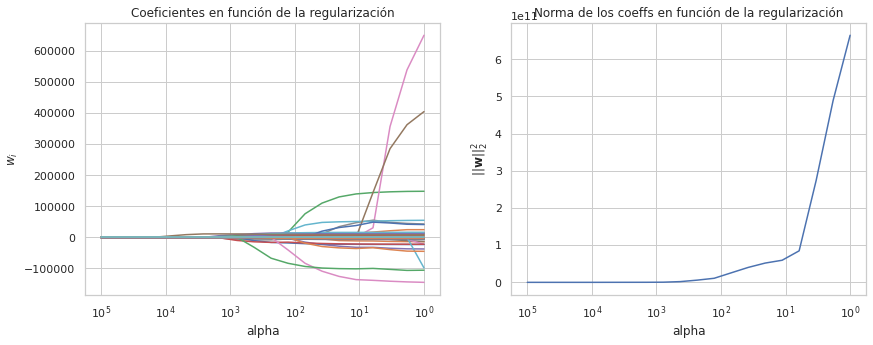

In [197]:
n_alphas = 20
alphas = np.logspace(0, 5, n_alphas)
coefs = []

norm2_coefs = []
for a in alphas:
  polyfeat = PolynomialFeatures(degree=2)
  X_trainpoly = polyfeat.fit_transform(df_train[features])
  X_testpoly = polyfeat.fit_transform(df_test[features])
  poly = linear_model.ElasticNet(alpha=a, l1_ratio=1).fit(X_trainpoly, df_train['price'])
  coefs.append(poly.coef_)
  norm2_coefs.append(np.dot(poly.coef_, poly.coef_.T))

# Display results
plt.figure(figsize=(14, 5))

ax = plt.subplot(1, 2, 1)
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('$w_i$')
plt.title('Coeficientes en función de la regularización')
plt.axis('tight')


ax = plt.subplot(1, 2, 2)
ax.plot(alphas, norm2_coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('$||\mathbf{w}||^2_2$')
plt.title('Norma de los coeffs en función de la regularización')
plt.axis('tight')
plt.show()

In [198]:
polyfeat = PolynomialFeatures(degree=2)
X_trainpoly = polyfeat.fit_transform(df_train[features])
X_testpoly = polyfeat.fit_transform(df_test[features])
poly = linear_model.ElasticNet(alpha=1000, l1_ratio=1, normalize=False).fit(X_trainpoly, df_train['price'])

df_coef = pd.DataFrame(
    data = {'coeficientes':poly.coef_, 'features':polyfeat.get_feature_names(df_train[features].columns)}
)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250102077456690.34, tolerance: 230536787595.21185
  positive)


Veamos las variables que tienen coeficientes igual a cero

In [199]:
df_coef[df_coef['coeficientes']==0]

,coeficientes,features
0,0.0,1
1,-0.0,bedrooms
2,-0.0,bathrooms
5,0.0,floors
6,0.0,waterfront
7,-0.0,view
8,-0.0,condition
9,0.0,grade
15,-0.0,lat
16,-0.0,long


Ahora veamos las variables con coeficientes más altos:

In [200]:
df_coef[df_coef['coeficientes']>0].sort_values(by='coeficientes',ascending=False).head(50)

,coeficientes,features
135,11255.594763,grade^2
44,8146.634905,bathrooms grade
42,4014.872664,bathrooms view
112,3795.270559,view^2
113,1954.080886,view condition
114,1538.275033,view grade
19,1350.189077,bedrooms^2
27,1314.700816,bedrooms grade
141,747.205377,grade lat
50,481.330228,bathrooms lat


Como se puede observar, con la ecuación de segundo grado los atributos más importantes son **Grade, Bathrooms, View, Condition y Lat**

# **7. Conclusión**

---



Se ha analizado el problema del negocio, se realizó diferentes métodos de predicción, logrando un RMSE 178500 USD en la predicción, la cual se consiguió a través de una regresión polinómica de segundo grado regularizado con el método Elastic Net con parametros alpha = 1000 (penalidad L1) y ratio L1 = 1 (convirtiendo Elastic Net en Lasso) sin presentar sobre ajuste. 

Gracias a esta regularización se pudieron descartar atributos y combinaciones de atributos (los cuales se detallaron anteriormente)